In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [5]:
#데이터 가져오기
(x_train, t_train), (x_test, t_test)=mnist.load_data()

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [7]:
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

In [8]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [12]:
#모델구축 cnn
cnn=Sequential()
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
# 완전연결성 평탄화
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [14]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) #정답 원 핫으로 안 만들었을 때 sparse
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [15]:
hist=cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test)) # 전체 크기를 배치 사이즈로 애폭크기가 줄어듬

Epoch 1/30
469/469 [==============================] - 47s 100ms/step - loss: 0.2264 - accuracy: 0.9305 - val_loss: 0.0492 - val_accuracy: 0.9835
Epoch 2/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0818 - accuracy: 0.9754 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 3/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 4/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 5/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0263 - val_accuracy: 0.9912
Epoch 6/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 7/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0292 - val_ac

In [16]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9927


[0.03793193772435188, 0.9926999807357788]

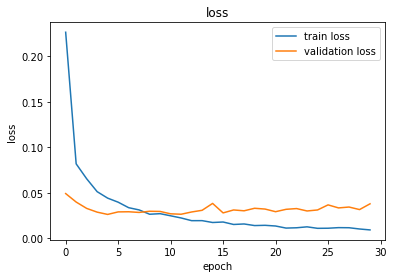

In [18]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

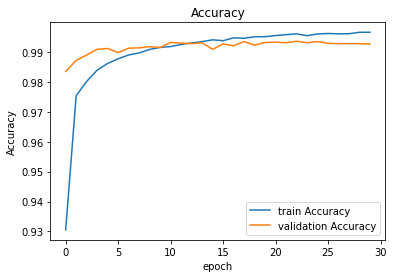

In [19]:
# loss대신 정확도
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()